### Feed Forward Neural Network

#### Dataset :
    MNIST dataset consisting of grayscale images and corresponding labels
    Images contain a digit from 0-9 and label identifies the digit in the image

#### Model:
    We are using a simple neural network with a single hidden layer.
    hidden_layer has 128 units and input layer has 64 neuron units.
    Input data is passed in batches of size 64.
    We are using ReLU activation after the input layer.
    Output corresponds to ten classes each representing the predicted digit for the passed input image
    Adam is being used as the optimizer to minimize crossEntropy loss.

#### Training Loop:
    It runs across the training batches for 10 epochs.
    In each epoch, we do a forward pass, followed by loss calculation and then backward pass for updating model parameters.

#### Test results
    We pass the test dataset which is different from training dataset through the trained NN.
    Results from the model are then compared against the actual labels.
    Accuracy is being used as the metric to measure how well the model is performing.
    Accuracy = (correct predictions / total predictions)*100 %

In [151]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt
%matplotlib inline

In [158]:
class DataWrapper:
    def __init__(self):
        self.trainDataset = None
        self.testDataset = None
        self.trainDataLoader = None
        self.testDataLoader = None

        self.loadDatasets()
        self.createDataLoaders()

    def loadDatasets(self):
        # root -> path where we want to save the downloaded data
        # train -> Whether this is training dataset
        # transform -> Any modifications to be applied to data
        self.trainDataset = datasets.MNIST(root="./mnist_data",
                                       download= True,
                                       train = True,
                                       transform=transforms.ToTensor())
        
        self.testDataset = datasets.MNIST(root="./mnist_data",
                                     train=False,
                                     download=True,
                                     transform=transforms.ToTensor())
    def createDataLoaders(self):
        self.trainDataLoader = DataLoader(dataset=train_dataset,
                                              batch_size=64,
                                              shuffle=True)
        
        self.testDataLoader = DataLoader(dataset=test_dataset,
                                             batch_size=64,
                                             shuffle=False)

    def show_image(self, image, label, prediction=True):
        if prediction:
            print("Prediction:", label)
        else:
            print("Label:", label)
        plt.imshow(image.squeeze(), cmap="gray")
        plt.show()

    def showExamples(self, n=3, train=True):
        dataset, prediction = (self.trainDataset, False) if train else (self.testDataset, True)
        while(n):
            image, label = dataset[n]
            self.show_image(image, label, prediction)
            n -= 1

#### Visulaize some images from dataset

Label: 1


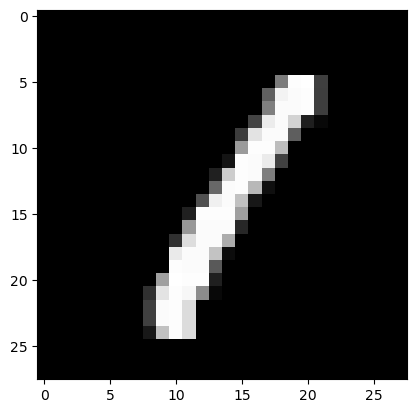

Label: 4


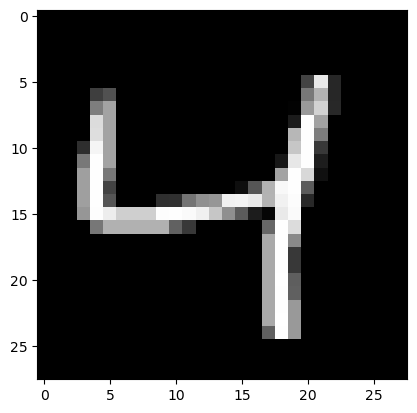

Label: 0


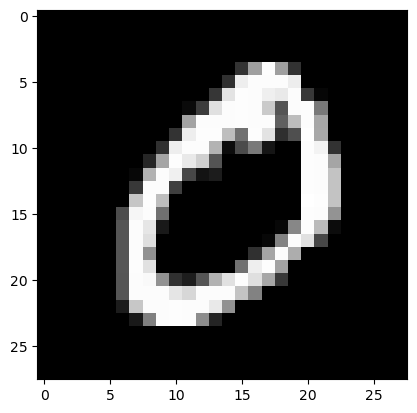

In [159]:
data = DataWrapper()
data.showExamples()

#### Model and wrapper to run training/testing

In [160]:
# Feed Forward Neural Network
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FFNN, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.hidden_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.hidden_layer(x)
        return x


In [169]:
class NN_Wrapper:
    def __init__(self, **kwargs):
        self.input_size = kwargs.get("input_size", 28*28)
        self.hidden_size = kwargs.get("hidden_size", 128)
        self.lr = kwargs.get("learning_rate", 0.001)
        self.num_classes = kwargs.get("num_classes", 10)
        self.epochs = kwargs.get("epochs", 5)
        self.batch_size = kwargs.get("batch_size", 64)

        self.model = FFNN(self.input_size, self.hidden_size, self.num_classes)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        self.accuracy = 0.0

        self.data = DataWrapper()
        
    def run(self):
        self.train()
        self.test()

    def train(self):
        # Training Loop
        print("Training the model...")
        steps = len(self.data.trainDataLoader)
        for epoch in range(self.epochs):
            for index, (images, labels) in enumerate(train_dl):
                images = images.reshape(-1, input_size) # (64, 1, 28, 28) -> (64, 784)
                
                # Forward Pass
                out = self.model(images)
        
                # Loss calculation
                loss = self.criterion(out, labels)

                if index % 500 == 0:
                    print("Epoch [{}/{}], Step [{}/{}], Loss - {:.2f}".format(epoch, self.epochs,
                                                                             i, steps, loss.item()))
                # Clean up gradients
                self.optimizer.zero_grad()
                
                # Backward Pass (Gradient calculation)
                loss.backward()
            
                # Parameters update
                self.optimizer.step()


    def test(self):
        print("\n\nTesting the model...")
        total_predictions = 0
        correct_predictions = 0
        
        for i, (images, labels) in enumerate(self.data.testDataLoader):
            images = images.reshape(-1, self.input_size)
            output = self.model(images)
        
            _, predictions = torch.max(output, dim=1)
            total_predictions += labels.size(0)
            correct_predictions += (predictions == labels).sum().item()
        print("Accuracy: {}%".format(correct_predictions/total_predictions*100))

In [170]:
handle = NN_Wrapper()

In [171]:
handle.run()

Training the model...
Epoch [0/5], Step [156/938], Loss - 2.31
Epoch [0/5], Step [156/938], Loss - 0.14
Epoch [1/5], Step [156/938], Loss - 0.11
Epoch [1/5], Step [156/938], Loss - 0.15
Epoch [2/5], Step [156/938], Loss - 0.08
Epoch [2/5], Step [156/938], Loss - 0.11
Epoch [3/5], Step [156/938], Loss - 0.06
Epoch [3/5], Step [156/938], Loss - 0.12
Epoch [4/5], Step [156/938], Loss - 0.08
Epoch [4/5], Step [156/938], Loss - 0.02
Testing the model...
Accuracy: 97.42%


#### Visualize predictions

Actual Label :  0
Prediction: 0


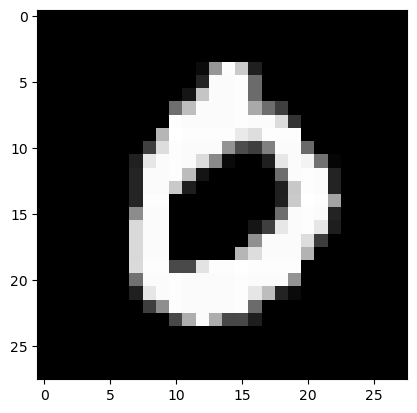

In [178]:
# Check predictions
image, label = handle.data.testDataset[3]  # Change the index value to pick any other image
prediction = handle.model(image.reshape(-1, 784))
_, predicted_label = torch.max(prediction, dim=1)
print("Actual Label : ", label)
handle.data.show_image(image, predicted_label.item(), prediction=True)